In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# remove warning
import warnings
warnings.filterwarnings(action='ignore')

# Step-1: Data gathering

In [3]:
data=pd.read_csv('data\\Iris.csv',index_col='Id') # ID column use as index column
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
data.shape

(150, 5)

# Step-2:  Data Preprocessing

In [126]:
data['Species']=data['Species'].apply(lambda s: s[5:])
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [128]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Step-3:Exploratory Data Analysis (EDA)

In [129]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [130]:
data.groupby(by='Species').mean() # return mean value of every species acording to species colume

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


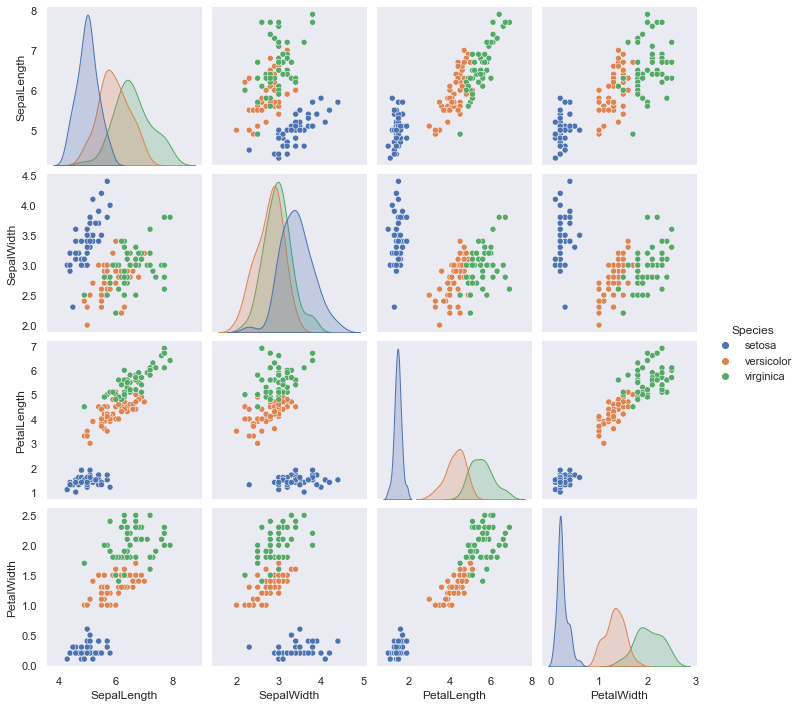

In [131]:
#plt.figure(figsize=(10,10))
sns.set(style='dark')
sns.pairplot(data,hue='Species')
plt.grid()

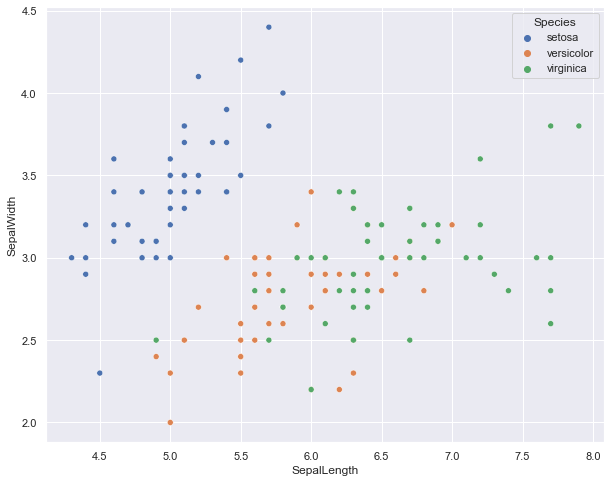

In [132]:
plt.figure(figsize=(10,8))
sns.set(style='dark')
sns.scatterplot(x='SepalLength',y='SepalWidth', data=data,hue='Species',)
plt.grid()

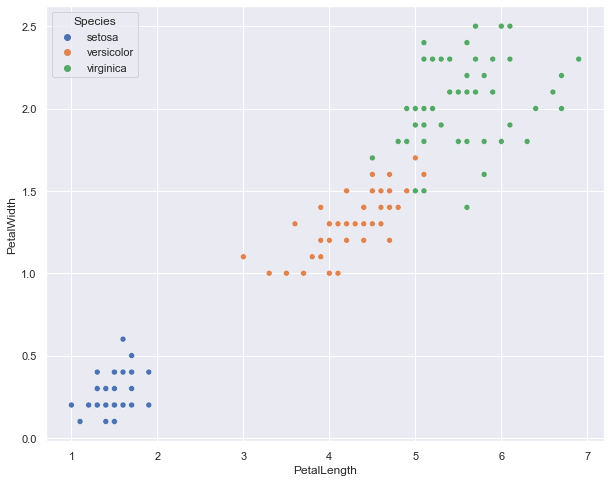

In [133]:
plt.figure(figsize=(10,8))
sns.set(style='dark')
sns.scatterplot(x='PetalLength',y='PetalWidth', data=data,hue='Species',)
plt.grid()

<AxesSubplot:xlabel='PetalLength'>

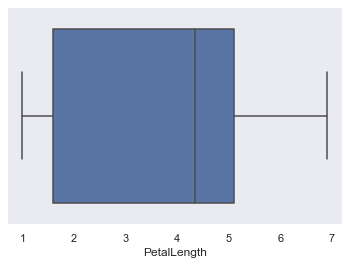

In [134]:
sns.boxplot(data=data,x='PetalLength')

<AxesSubplot:xlabel='PetalWidth'>

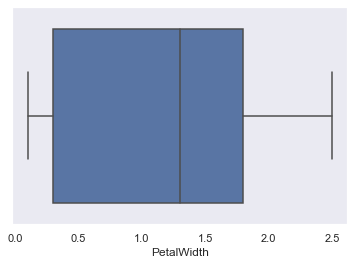

In [135]:
sns.boxplot(data=data,x='PetalWidth')

# Step-4: Feature Engineering and selection

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [137]:
data['Species']=encoder.fit_transform(data.Species.values.ravel())
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [138]:
# Another process
# target.iloc[:,0]=encoder.fit_transform(target.values.ravel()) 
# target

In [139]:
correlation=data.corr() # getting correlation
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

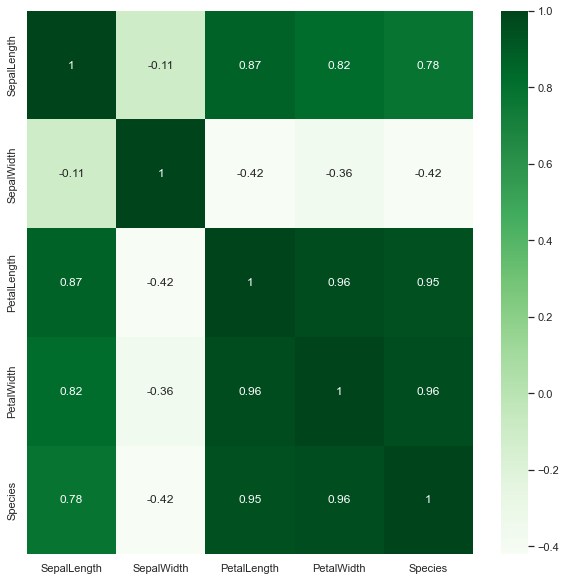

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Greens')

In [141]:
data.Species.value_counts() # count number of values of Species column

0    50
1    50
2    50
Name: Species, dtype: int64

In [142]:
Features=data.drop(columns=['Species'])
Features

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [143]:
target=data[['Species']] # target value put 1D necessary of prediction
target

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


Train test split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
xtrain,xtest,ytrain,ytest=train_test_split(Features,target,test_size=0.3,random_state=42)

In [146]:
xtrain.shape

(105, 4)

In [147]:
xtest.shape

(45, 4)

Feature selection

In [148]:
from sklearn.feature_selection import mutual_info_classif
selector=mutual_info_classif(xtrain,ytrain,random_state=42) # ti helps us to select featre which will be important to predict data 
selector

array([0.47605143, 0.23216664, 0.96235843, 0.93971365])

In [149]:
selector=pd.DataFrame(selector) # selector convert into dataframe
selector.columns=['Score']
selector

,Score
0,0.476051
1,0.232167
2,0.962358
3,0.939714


In [150]:
selector.index=Features.columns # selector index take access features column name
selector

,Score
SepalLength,0.476051
SepalWidth,0.232167
PetalLength,0.962358
PetalWidth,0.939714


In [151]:
selector.sort_values('Score', ascending=False) # sorting all values of score

,Score
PetalLength,0.962358
PetalWidth,0.939714
SepalLength,0.476051
SepalWidth,0.232167


<AxesSubplot:>

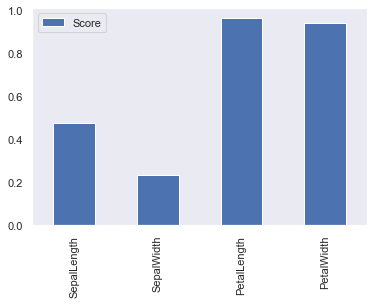

In [152]:
#selector.plot.barh() # ploting bar chart
selector.plot.bar()

In [153]:
# Extra 
selector.sort_index(ascending=False) # # sorting all name of index
Features.sort_values('PetalLength' ,ascending=False)

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
119,7.7,2.6,6.9,2.3
123,7.7,2.8,6.7,2.0
118,7.7,3.8,6.7,2.2
106,7.6,3.0,6.6,2.1
132,7.9,3.8,6.4,2.0
...,...,...,...,...
37,5.5,3.5,1.3,0.2
36,5.0,3.2,1.2,0.2
15,5.8,4.0,1.2,0.2


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
extractor=SelectKBest(mutual_info_classif,k=2) # best feature selection according to selector values
extractor.fit(xtrain,ytrain)
best_feature=extractor.get_feature_names_out() # getting best feature name
best_feature

# Step-5: Modeling

Parameters

    | penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2' ##
    Specify the norm of the penalty:
•	'none': no penalty is added;
•	'l2': add a L2 penalty term and it is the default choice;
•	'l1': add a L1 penalty term;
•	'elasticnet': both L1 and L2 penalty terms are added.

l1 means absolute error
l2 means squired error
    | max_iter : int, default=100 ##
Maximum number of iterations take to get the best line
Maximum number of iterations taken for the solvers to converge.
    | tol : float, default=1e-4(0.0001) ##
Tolerance for stopping criteria.
    |C : float, default=1.0  (Tolerance value) ##
referece lolerate value of miss classification (c=1 means only one miss value tolaratable)

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

    |solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs' ##
solver optimize/reduce error upto tol=0.0001

Algorithm to use in the optimization problem. Default is 'lbfgs'. To choose a solver, you might want to consider the following aspects:
- For small datasets, 'liblinear' is a good choice, whereas 'sag'
and 'saga' are faster for large ones; - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; - 'liblinear' is limited to one-versus-rest schemes.

In [155]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(xtrain[best_feature], ytrain) #Fit/train the model according to the given training data.

LogisticRegression()

In [156]:
ypred=clf1.predict_proba(xtest[best_feature]) # predict_proba Returns the probability array of the sample for each class in the model, 
ypred

array([[3.71318893e-03, 8.11915925e-01, 1.84370886e-01],
       [9.35072374e-01, 6.49261216e-02, 1.50429641e-06],
       [1.89128871e-08, 1.77746020e-03, 9.98222521e-01],
       [5.28299055e-03, 7.67392487e-01, 2.27324522e-01],
       [2.23848128e-03, 6.80100220e-01, 3.17661299e-01],
       [9.58808595e-01, 4.11906404e-02, 7.64183701e-07],
       [6.85620052e-02, 9.11114048e-01, 2.03239471e-02],
       [1.16657583e-04, 1.05784170e-01, 8.94099172e-01],
       [5.28299055e-03, 7.67392487e-01, 2.27324522e-01],
       [3.35876003e-02, 9.33576576e-01, 3.28358232e-02],
       [2.42192543e-04, 1.97399714e-01, 8.02358093e-01],
       [9.71026258e-01, 2.89735368e-02, 2.04743222e-07],
       [9.76666155e-01, 2.33336779e-02, 1.66695701e-07],
       [9.62821297e-01, 3.71783710e-02, 3.31700627e-07],
       [9.60190239e-01, 3.98091826e-02, 5.78630590e-07],
       [2.46914046e-03, 6.22404062e-01, 3.75126797e-01],
       [5.39203710e-06, 2.86839423e-02, 9.71310666e-01],
       [3.50096006e-02, 9.39112

In [157]:
ypred[2]

array([1.89128871e-08, 1.77746020e-03, 9.98222521e-01])

In [158]:
np.argmax(ypred[2]) # return the index of maximum value

2

In [159]:
max_v=np.argmax(ypred,axis=1) # return all maximum values
max_v

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [160]:
encoder.inverse_transform(max_v) # convert values/number to text

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [161]:
ypred_1=clf1.predict(xtest[best_feature]) # predict method Returns directly the the predicted maximum values of the each class in the model, 
ypred_1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [162]:
encoder.inverse_transform(ypred_1)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [ ]:
ytest

# step-6: Evaluation

In [164]:
from sklearn.metrics import accuracy_score , confusion_matrix, plot_confusion_matrix    # sklearn.metrics stores all evaluation module
accuracy_score(ytest, ypred_1) # accuracy_score=1 means our model is 100% fitted/accurate, here no miss classification in this data

1.0

In [165]:
confusion_matrix(ytest, ypred_1) # all values are diagonaly that means we gattig currect prediction , there ara no wrong prediction
                                 # other place contain zero means wrong prediction is zore

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

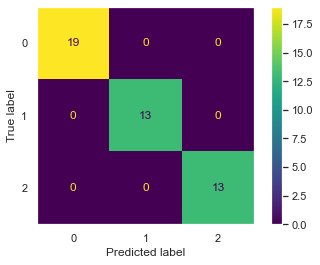

In [166]:

plot_confusion_matrix(clf1, xtest[best_feature],ypred_1) # visualization of confusion matrix

In [167]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [168]:
f1_score(ytest,ypred_1,average='weighted') # one means model is 100% accurate

1.0

In [169]:
precision_score(ytest,ypred_1,average='weighted') # one means model is 100% accurate

1.0

In [170]:
recall_score(ytest, ypred_1,average='weighted') # one means model is 100% accurate

1.0

# step-7: Cross validation

In [171]:
from sklearn.model_selection import cross_val_score 
cv=cross_val_score(clf1, Features[best_feature], target, cv=5) # cross validation checking                                                               # cv=5 referces the number of cross validation set
cv

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [172]:
cv.mean() # mean value of all cross values which is actual accracy

0.96

# Step-8: Model tuning

In [173]:
clf2=LogisticRegression(C=5,penalty='l2', solver='saga') # Tuning the model manually
cv=cross_val_score(clf2,Features[best_feature],target,cv=5) # again cross value checking
cv

array([1.        , 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [174]:
cv.mean()

0.9666666666666668

In [175]:
LogisticRegression().get_params() # Return Parameter names mapped to their values.

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

** Another way of model tuning  **

Another approach of model tuning which works dynamically
By this we can easily find uot best model applying cross validation
It will do all the possible combination and try to find out the best combination which provide best accuricy

In [8]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Grid=GridSearchCV(
    
    clf2,
    param_grid={

    'C':[2,3,4,5,6],
    'solver':['newton-cg','liblinear', 'sag','saga','lbfgs']
    },
    cv=5, scoring='accuracy' # here depend on accuracy score we find out best model
)
Grid.fit(Features[best_feature],target) # fit the model to the grid

In [178]:
Grid.best_params_ # find the best parametter for this data set

{'C': 3, 'solver': 'saga'}

# Step-9: Model Visualization

In [179]:
clf3=LogisticRegression(C=3, solver='saga') # set the best parametter
clf3.fit(Features[best_feature],target)

LogisticRegression(C=3, solver='saga')

In [180]:
Features.PetalLength.values #convert into values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

linspeice work on only one axis
meshgrid work on two axis

In [181]:
xmin,xmax=Features.PetalLength.values.min(), Features.PetalLength.values.max()  # petalLength stay x-axis 
ymin,ymax=Features.PetalWidth.values.min(), Features.PetalWidth.values.max() # petalWidth stay y-axis 
xx,yy=np.meshgrid(
    np.arange(xmin-0.2, xmax+0.2, 0.001), np.arange(ymin-0.2,ymax+0.2,0.001)
)


In [182]:
grid=np.c_[xx.ravel(), yy.ravel()] # covert 2D to 1D and concat value of x(PetalLength) with value of y(PetalWidth)
grid

array([[ 0.8  , -0.1  ],
       [ 0.801, -0.1  ],
       [ 0.802, -0.1  ],
       ...,
       [ 7.098,  2.699],
       [ 7.099,  2.699],
       [ 7.1  ,  2.699]])

In [183]:
ypred_2=clf3.predict(grid) # predict the grid
ypred_2

array([0, 0, 0, ..., 2, 2, 2])

In [184]:
ypred_2=ypred_2.reshape(yy.shape) # reshape 1D to 2D 
ypred_2

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

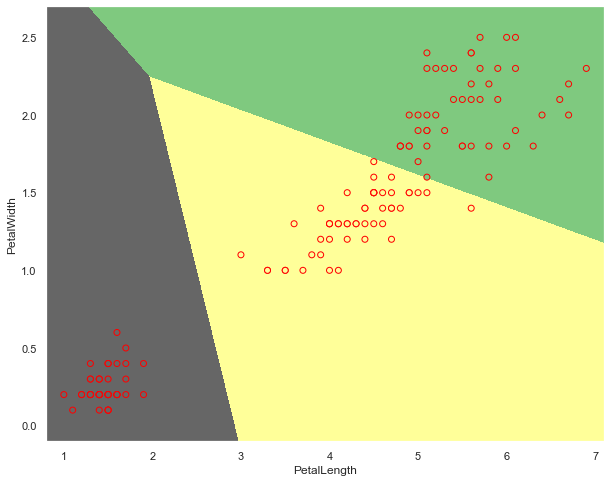

In [185]:
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,ypred_2)
plt.set_cmap(plt.cm.Accent_r)
predictions=clf3.predict(Features[best_feature])
plt.scatter(Features.PetalLength,Features.PetalWidth, c=predictions,edgecolors='red')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

In [186]:
xx.shape

(2800, 6301)

In [187]:
yy.shape

(2800, 6301)

In [188]:
ytest.shape

(45, 1)

In [189]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
